In [2]:
cd ..

/Users/nicogarcia/Documents/Stanford/Senior/fall-2019/cs-229/cs229-f19-wiki-forecast


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

mapping = pd.read_csv("sample_data/trial_0/mapping.csv")
ts = pd.read_csv("sample_data/trial_0/ts.csv")

In [15]:
X = ts.iloc[:16,1:].fillna(1e-6).values
X.shape

(6, 608)

In [16]:
t = 0
training_size = 90
window_size = 28

# indices into the matrix
T = X.shape[1]
indices = [[i, j] for i, j in 
           zip(range(0, T, window_size), range(window_size, T, window_size))]

In [17]:
indexer = (
    np.arange(window_size).reshape(1, -1) 
    + window_size*np.arange(T//window_size).reshape(-1, 1)
)

In [18]:
panes = X[:,indexer]
train = panes[:,0,:]
test = panes[:,1,:]
validate = panes[:,2,:]

rmse: 8261.439135479759
mape: 6535714.524999382


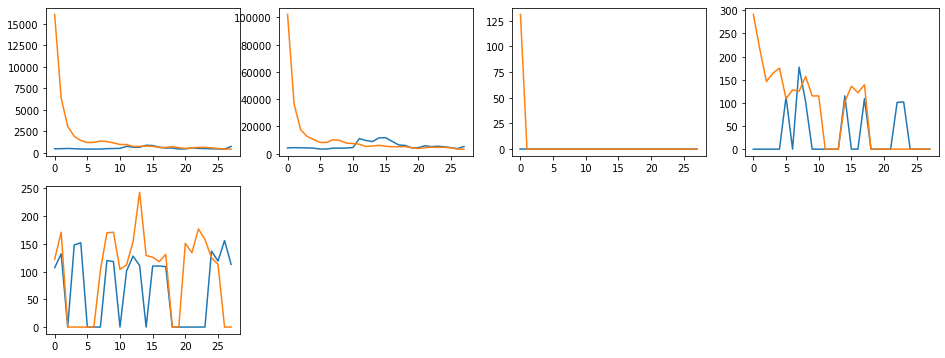

In [23]:
from sklearn import linear_model, kernel_ridge, metrics

def rmse(X, y):
    return np.sqrt(metrics.mean_squared_error(X, y))

def mape(X, y):
    return abs(np.divide(y - X, y)).sum()/y.size

def summarize(y, y_pred):
    print(f"rmse: {rmse(y, y_pred)}")
    print(f"mape: {mape(y, y_pred)}")
    plt.figure(figsize=(16, 6))
    for i in range(5):
        plt.subplot(2, 4, i+1)
        plt.plot(y[i].T, label="y")
        plt.plot(y_pred[i].T, label="y_hat")
    plt.show()
    
summarize(validate, test)

rmse: 3807.5927833593228
mape: 2.440775404804969


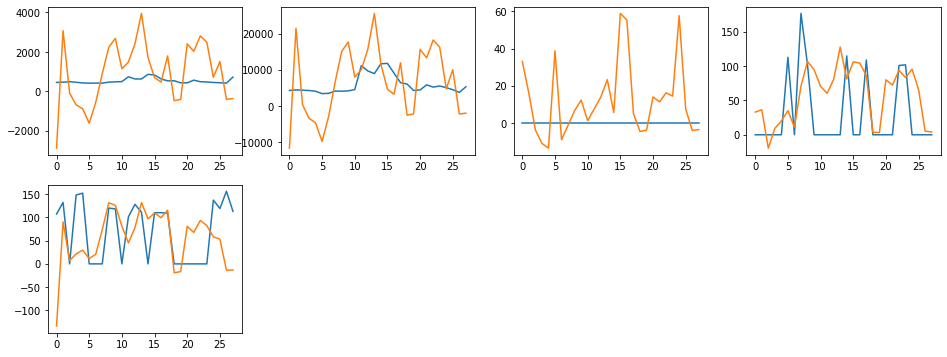

In [24]:
model = linear_model.LinearRegression()
model.fit(train, test)
summarize(validate, model.predict(test))